<a href="https://colab.research.google.com/github/caalinlu/PyTorch/blob/master/PyTorch%E7%90%86%E8%A7%A3%E6%9B%B4%E5%A4%9A%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E4%BC%98%E5%8C%96%E6%96%B9%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch中使用torch.optim优化神经网络以及优化器的选择

神经网络优化器，主要是为了优化我们的神经网络，使他在我们的训练过程中快起来，节省社交网络训练的时间。在pytorch中提供了torch.optim方法优化我们的神经网络，torch.optim是实现各种优化算法的包。最长有的方法都已经支持，接口很常规，所以以后也可以更容易的集成更加复杂的方法。

## 如何使用optimizer
要使用torch.optim，您必须构造一个optimizer对象。这个对象能保存当前的参数状态并且基于计算梯度更新参数。

## 构建一个优化器
要构造一个Optimizer，你必须给它一个包含参数（必须都是Variable对象）进行优化。然后，您可以指定optimizer的参 数选项，比如学习率，权重衰减等。具体参考torch.optim中文文档。

In [0]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = optim.Adam([var1, var2], lr = 0.0001)

#  优化方法总结

## 1.SGD
### 1.1 Batch Gradient Descent


在每一轮的训练过程中，Batch Gradient Descent算法用整个训练集的数据计算cost fuction的梯度，并用该梯度对模型参数进行更新：
 


> *w = w - learning_rate × ▽w*




优点：


*   cost fuction若为凸函数，能够保证收敛到全局最优值；若为非凸函数，能够收敛到局部最优值


缺点：


*   由于每轮迭代都需要在整个数据集上计算一次，所以批量梯度下降可能非常慢
*   训练数较多时，需要较大内存
*   批量梯度下降不允许在线更新模型，例如新增实例。





### 1.2 Stochastic Gradient Descent 


和批梯度下降算法相反，Stochastic gradient descent 算法每随机读入一个数据，便立刻计算cost fuction的梯度来更新参数：

> *w = w - learning_rate × ▽w*


优点：



*   算法收敛速度快(在Batch Gradient Descent算法中, 每轮会计算很多相似样本的梯度, 这部分是冗余的)
*   可以在线更新
*   有几率跳出一个比较差的局部最优而收敛到一个更好的局部最优甚至是全局最优。

缺点：
*   容易收敛到局部最优，并且容易被困在鞍点。




### 1.3  Mini-batch Gradient Descent

mini-batch Gradient Descent的方法是在上述两个方法中取折衷, 每次从所有训练数据中取一个子集（mini-batch） 用于计算梯度：


> *w = w - learning_rate × ▽w*

Mini-batch Gradient Descent在每轮迭代中仅仅计算一个mini-batch的梯度，不仅计算效率高，而且收敛较为稳定。该方法是目前深度学训练中的主流方法。


上述三个方法面临的主要挑战如下：


*   选择适当的学习率$ \alpha$较为困难。太小的学习率会导致收敛缓慢，而学习速度太快会造成较大波动，妨碍收敛
*   目前可采用的方法是在训练过程中调整学习率大小，例如模拟退火算法：预先定义一个迭代次数m，每执行完m次训练边减小学习率，或者当当cost function的值低于一个阈值时减小学习率。然而迭代次数和阈值必须事先定义，因此无法适应数据集的特点。
*   近期的研究表明，深层神经网络之所以比较难训练，并不是因为容易进入local minimum。相反，由于网络结构非常复杂，在绝大多数清凉下即使是local minimum 也可以得到非常好的结果。而之所以难训练是因为学习过程容易陷入到马鞍面中，即在坡面上，一部分点是上升的，一部分点是下降的。而这种情况比较容易出现在平坦区域，在这种区域中，所有方向的梯度值都几乎是0。






In [0]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
 
# Ada
J = lambda w1, w2: w1 ** 2 + 10 * w2 ** 2
J_prime1 = lambda w1: 2 * w1
J_prime2 = lambda w2: 20 * w2

w1 = 1
w2 = -1
epoch = 200
lr = 0.1
y = []
Loss = []
W1 = []
W2 = []
beta = 0.9

for i in range(epoch):
  w1 = w1 - lr * J_prime1(w1)
  w2 = w2 - lr * J_prime2(w2)
  Loss.append(J(w1, w2))
  

<Figure size 432x288 with 0 Axes>

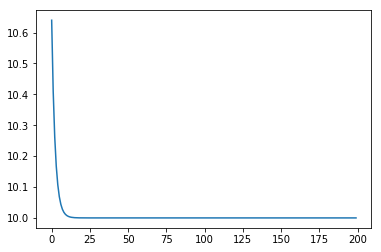

<Figure size 432x288 with 0 Axes>

In [2]:
plt.plot(Loss)
plt.figure()

## 2. Momentum
SGD方法的一个缺点是其更新方向完全依赖于当前batch计算的梯度，因此十分不稳定。Momentum算法借用了物理中的动量概念，他模拟的是物体运动的惯性，即在更新的时候在一定程度上保留之前更新的方向，同时利用当前batch的梯度微调最终的更新方向。这样一来，可以在一定程度上增加稳定性，从而学习的跟快，而且对应于之前叙述的SGD可能会卡在鞍面的问题，Momentum则又能力去摆脱这个问题，其拥有一定摆脱局部最优的能力：

常规SGD方法：
> *w = w - learning_rate × ▽w* 


加入Momentum的方法：
> *Vt = $ \beta $ × Vt-1 + (1- $ \beta $ ) dW*


> *W = w - learning_rate ×  Vt*


在上面的公式中Vt-1 是损失函是在前t-1轮迭代过程中累计的梯度动量，$ \beta $是梯度累积的一个指数，这里我们一般设置值为0.9。所以Momentum优化器的主要思想就是利用了类似于移动指数加权平均方法来对网络的参数进行平滑处理，让梯度的摆动幅度变得更小。
dW是损失函数反向春波时候所求得的梯度，下面两个公式网络权重向量和偏置向量的更新公式，$ \alpha $是网络的学习率。当我们使用Momentum优化算法的时候，可以解决mini-batch SGD优化算法更新幅度摆动大的问题，同时可以使得网络的收敛速度更快。


[SGD with Momentum 详细解释](https://zhuanlan.zhihu.com/p/34240246)

In [0]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
 
# Ada
J = lambda w1, w2: w1 ** 2 + 10 * w2 ** 2
J_prime1 = lambda w1: 2 * w1
J_prime2 = lambda w2: 20 * w2
w1_Momentum = 1
w2_Momentum = -1
v = 0
s = 0
Loss_Momentum = []
beta1 = 0.9

for i in range(epoch):
  v = beta1 * v + (1-beta) * J_prime1(w1_Momentum)
  s = beta1 * s + (1-beta) * J_prime2(w2_Momentum)
  w1_Momentum = w1_Momentum - lr * v
  w2_Momentum = w2_Momentum - lr * s
  Loss_Momentum.append(J(w1_Momentum, w2_Momentum))
  

<Figure size 432x288 with 0 Axes>

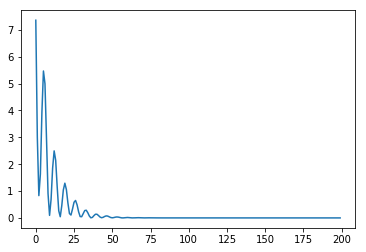

<Figure size 432x288 with 0 Axes>

In [4]:
plt.plot(Loss_Momentum)
plt.figure()

## 3. Adagrad
上述方法中，对于每一个参数 的训练都使用了相同的学习率α。Adagrad算法能够在训练中自动的对learning rate进行调整，对于出现频率较低参数采用较大的α更新；相反，对于出现频率较高的参数采用较小的α更新。因此，Adagrad非常适合处理稀疏数据。

因此，SGD中参数更新的过程可写为：


>*$s_{dw} =   dW^{2}$*

>*$s_{db} =   dW^{2}$*


Adagrad在每轮训练中对每个参数的学习率进行更新，参数更新公式如下：


>*$W = W - \alpha \frac{dW}{\sqrt{s_{dw}} + \delta}$*

>*$W = W - \alpha \frac{dW}{\sqrt{s_{db}} + \delta}$*


[Adagrad详细解释](https://zhuanlan.zhihu.com/p/29920135)

In [0]:
# Ada自适应梯度调节法
w1_Adagrad = 1
w2_Adagrad = -1
Loss_Adagrad = []
s1 = s2 = 0


for i in range(epoch):
  s1 += J_prime1(w1_Adagrad) ** 2
  s2 += J_prime2(w2_Adagrad) ** 2
  w1_Adagrad = w1_Adagrad - lr * (J_prime1(w1_Adagrad) / (np.sqrt(s1) + 0.00000001))
  w2_Adagrad = w2_Adagrad - lr * (J_prime2(w2_Adagrad) / (np.sqrt(s2) + 0.00000001))
  Loss_Adagrad.append(J(w1_Adagrad, w2_Adagrad))
  


<Figure size 432x288 with 0 Axes>

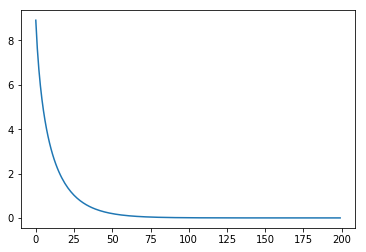

<Figure size 432x288 with 0 Axes>

In [6]:
plt.plot(Loss_Adagrad)
plt.figure()

## 4. RMSProp
RMSProp算法的全称叫 Root Mean Square Prop，是Geoffrey E. Hinton在Coursera课程中提出的一种优化算法，在上面的Momentum优化算法中，虽然初步解决了优化中摆动幅度大的问题。所谓的摆动幅度就是在优化中经过更新之后参数的变化范围，但是其实学习率的问题还是没有解决，在优化时仍然使用的是同一个学习率。
为了进一步优化损失函数在更新中存在摆动幅度过大的问题，并且进一步加快函数的收敛速度，RMSProp算法对权重 W 和偏置 b 的梯度使用了微分平方加权平均数。
其中，假设在t轮迭代过程中，各个公式如下所示：

>*$s_{dw} =   \beta  s_{dw} + (1- \beta) dW^{2}$

>*$s_{db} =   \beta  s_{dw} + (1- \beta) dW^{2}$

>*$W = W - \alpha \frac{dW}{\sqrt{s_{dw}} + \delta}$*

>*$W = W - \alpha \frac{dW}{\sqrt{s_{db}} + \delta}$*

算法的主要思想就用上面的公式表达完毕了。在上面的公式中$s_{db}$和$s_{dw}$分别是损失函数在前t-1轮迭代过程中类的梯度梯度动量，$\beta$是梯度累积的一个指数。所不同的是，RMSProp算法对梯度计算了微分平方加权平均数。这种做法有理消除了摆动幅度大的方向，用来修正摆动幅度，是的各个维度的摆动幅度都比较小。另一方面也是的网络函数收敛更快。（比如当 dWdW 或者 dbdb 中有一个值比较大的时候，那么我们在更新权重或者偏置的时候除以它之前累积的梯度的平方根，这样就可以使得更新幅度变小）。为了防止分母为零，使用了一个很小的数值$\delta$ 来进行平滑，一般取值为e−8。




[RMSProp详细解释](https://zhuanlan.zhihu.com/p/34230849)

In [0]:
beta2 = 0.5
sw = 0
sb = 0
w1_RMSProp = 1
w2_RMSProp = -1
Loss_RMSProp = []

for i in range(epoch):
  sw = beta2 * sw + (1 - beta2) * (J_prime1(w1_RMSProp) ** 2)
  sb = beta2 * sb + (1 - beta2) * (J_prime2(w2_RMSProp) ** 2)
  w1_RMSProp = w1_RMSProp - lr * (J_prime1(w1_RMSProp) / (np.sqrt(sw) + 0.00000001))
  w2_RMSProp = w2_RMSProp - lr * (J_prime2(w2_RMSProp) / (np.sqrt(sb) + 0.00000001))
  Loss_RMSProp.append(J(w1_RMSProp, w2_RMSProp))
                      

<Figure size 432x288 with 0 Axes>

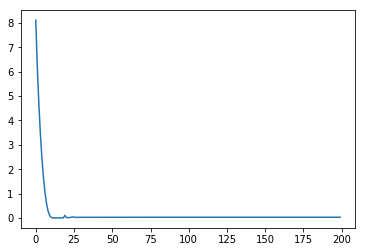

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(Loss_RMSProp)
plt.figure()

## 5. Adam
有了上面两种优化算法，一种可以使用类似于物理的动量来累积梯度，另一种可以使得收敛速度更快同时使得波动幅度更小。那么将两种算法结合起来所获得的表现一定会更好。Adam算法是将Momentum算法和RMSProp算法结合起来使用的一种算法，我们使用的参数基本和上面讲的一致，在训练的最开始我们需要初始化梯度的累积量和平方累积量。
>>>>>>*$v_{dw} = 0$*  , *$v_{db} = 0$*

>>>>>>*$v_{db} = 0$* , *$s_{db} = 0$*

假设在训练的第t轮训练中，我们可以计算得到Monmentum和RMSProp的参数更新：
>>>>>>$v_{dw} =   \beta v_{dw} + (1- \beta) dW$

>>>>>>$v_{db} =   \beta  v_{dw} + (1- \beta) dW$


>>>>>>$s_{dw} =   \alpha  s_{dw} + (1- \alpha) dW^{2}$

>>>>>>$s_{db} =   \alpha  s_{dw} + (1- \alpha) db^{2}$


由于移动指数平均在迭代的初期会导致和开始的值有较大的的差异，所有我们需要对上面求得的几个值做偏差修正。



>>>>>>*$v_{dw}^{c} =  \frac{v_{dw} }{1-\beta}$*

>>>>>>*$v_{db}^{c} =  \frac{v_{db} }{1-\beta}$*

>>>>>>*$v_{dw}^{c} =  \frac{v_{dw} }{1-\alpha}$*

>>>>>>*$s_{db}^{c} =  \frac{s_{db} }{1-\alpha}$*

通过上面的公式，我们就可以求得在第 t 轮迭代过程中，参数梯度累积量的修正值，从而接下来就可以根据Momentum和RMSProp算法的结合来对权重和偏置进行更新。 

>>>>>>*$W = W - lr \frac{v_{dw}^{c}}{\sqrt{s_{dw}^{c}} + \delta}$*

>>>>>>*$b = b- lr\frac{v_{db}^{c}}{\sqrt{s_{db}^{c}} + \delta}$*


上面的所有步骤就是Momentum算法和RMSProp算法结合起来从而形成Adam算法。在Adam算法中，参数$\beta$所对应的就是Momentum算法中的$\beta$值，一般取0.9，参数$\alpha$所对应的就是RMSProp算法中的$\beta$值，一般我们取0.999，而$\delta$是一个平滑项，我们一般取值为10的-8次方，而学习率则需要我们在训练的时候微调。

In [0]:
# Adam 是一个集成了多种优化器优势的方法，通过momentum解决了鞍点问题，通过ada解决了对瑞晓方向尺度矫正的问题，同时加入偏置，解决初始值过大的问题

w1_adam = 1
w2_adam = -1
v1 = 0
v2 = 0
s1 = 0
s2 = 0
beta3 = 0.9
beta4 = 0.999
Loss_ADAM = []

for i in range(epoch):
  v1 = beta3 * v1 + (1 - beta3) * (J_prime1(w1_adam))
  v2 = beta3 * v2 + (1 - beta3) * (J_prime1(w2_adam))
  s1 = beta4 * s1 + (1 - beta4) * (J_prime1(w1_adam) ** 2)
  s2 = beta4 * s2 + (1 - beta4) * (J_prime1(w2_adam) ** 2)
  w1_adam = w1_adam - lr * (v1 / (np.sqrt(s1) + 0.00000001))
  w2_adam = w1_adam - lr * (v2 / (np.sqrt(s2) + 0.00000001))
  Loss_ADAM.append(J(w1_adam, w2_adam))



<Figure size 432x288 with 0 Axes>

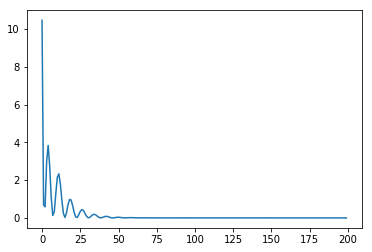

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(Loss_ADAM)
plt.figure()

# PyTorch优化器选择

In [0]:
from torch.autograd import Variable
import torch
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import torch.nn.functional as F

iris = load_iris()
iris_data = torch.from_numpy(iris.data) # 鸢尾花特征值(4个)
iris_target = torch.from_numpy(iris.target) # 鸢尾花目标值(类别)

# np.unique(iris.target)
# 注意线性输入层的设计，当输入Tensor为样本数*特征数
# Linear层的数self.l1 = nn.Linear(4, 10)的第一个参数是每个样本的大小
# 最后Linear层的输出注意是类别数

class LinearNet(nn.Module):
  def __init__(self):
    super(LinearNet, self).__init__()
    self.l1 = nn.Linear(4, 10)
    self.l2 = nn.Linear(10, 5)
    self.l3 = nn.Linear(5, 3)


  def forward(self, x):
    x = self.l1(x)
    x = F.relu(x)
    x = self.l2(x)
    x = F.relu(x)
    y_pred = self.l3(x)
    
    return y_pred
    
model = LinearNet()

criterion = nn.CrossEntropyLoss()

# L2正则化的目的就是为了让权重衰减到更小的值，在一定程度上减少模型过拟合的问题，所以权重衰减weight_decay也叫L2正则化。
optimizier = optim.Adam(model.parameters(), lr=0.05, betas=(0.9, 0.999), weight_decay=0.001)

Loss = []

for epoch in range(2000):
  optimizier.zero_grad()
  
  y_pred = model(torch.FloatTensor(iris_data.float()))
  loss = criterion(y_pred, iris_target)
  
  if epoch % 20 == 0:
    print("epoch =", epoch, "loss =", loss.data)
    Loss.append(loss.data)
  loss.backward()
  optimizier.step()
  
  

<Figure size 432x288 with 0 Axes>

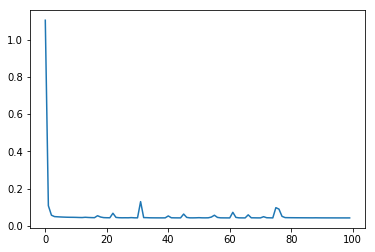

<Figure size 432x288 with 0 Axes>

In [61]:
plt.plot(Loss)
plt.figure()

In [49]:
# class torch.nn.Linear（in_features，out_features，bias = True ）[来源]
# 对传入数据应用线性变换：y = A x+ b

# 参数：	
# in_features - 每个输入样本的大小
# out_features - 每个输出样本的大小
# bias - 如果设置为False，则图层不会学习附加偏差。默认值：True

m = nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(input)
print(output.size())

torch.Size([128, 30])
